In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler


##**1 Exploratory Data Analysis (EDA):**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon #1/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


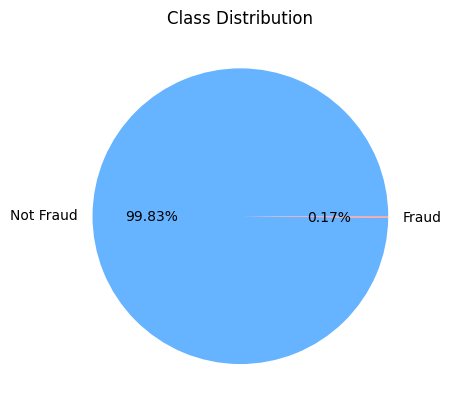

In [ ]:
df['Class'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%', labels=['Not Fraud', 'Fraud'], colors=['#66b3ff','#ff9999'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

This pie chart visualizes the distribution of the target variable (Class).
It clearly shows that the dataset is highly imbalanced:
* The vast majority of transactions are **Not Fraud** (~99.8%).
* Only a tiny fraction represents **Fraud** (~0.2%)

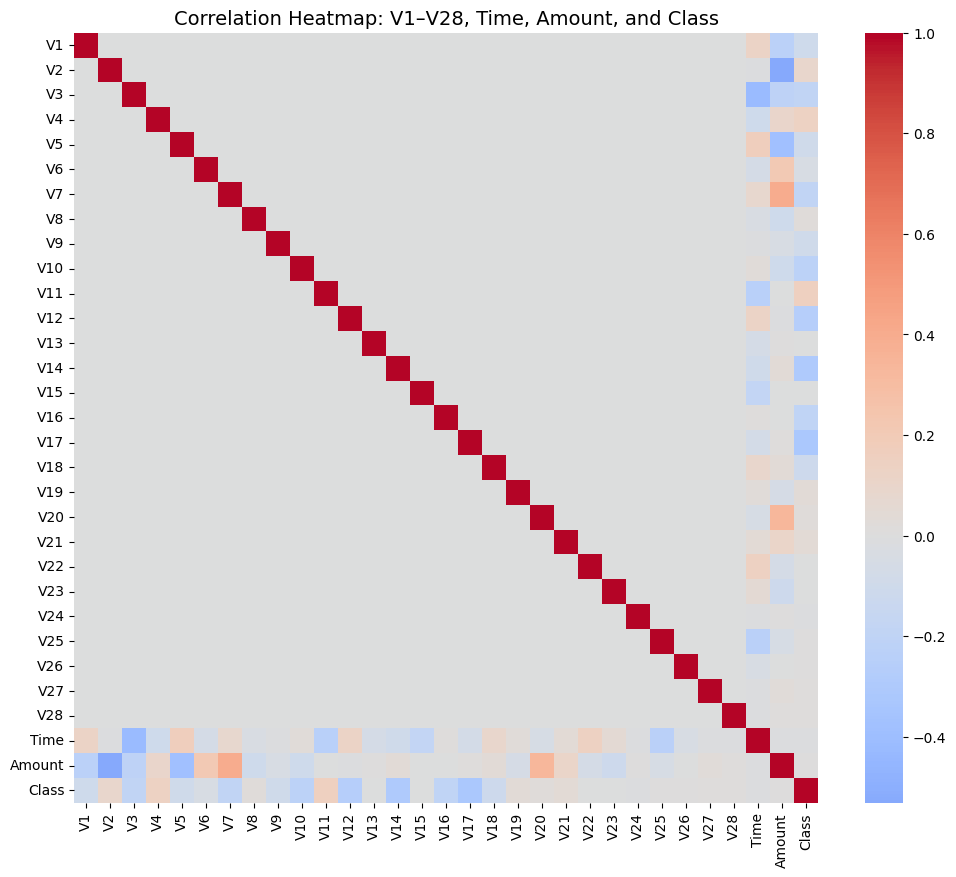

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant features (V1-V28, Time, Amount, Class)
features = [f'V{i}' for i in range(1, 29)] + ['Time', 'Amount', 'Class']
corr_matrix = df[features].corr(numeric_only=True)

# Plot a smaller correlation heatmap
plt.figure(figsize=(12, 10))  # Smaller size for more compact visualization
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap: V1–V28, Time, Amount, and Class", fontsize=14)
plt.show()

---

The correlation heatmap provides an overview of how all features (V1–V28, Time, Amount) relate to each other and to the target (Class). This step helps to quickly identify which features are **most correlated** with fraud and with each other, guiding the choice of features for further detailed analysis.

---

Top correlated features: ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7']


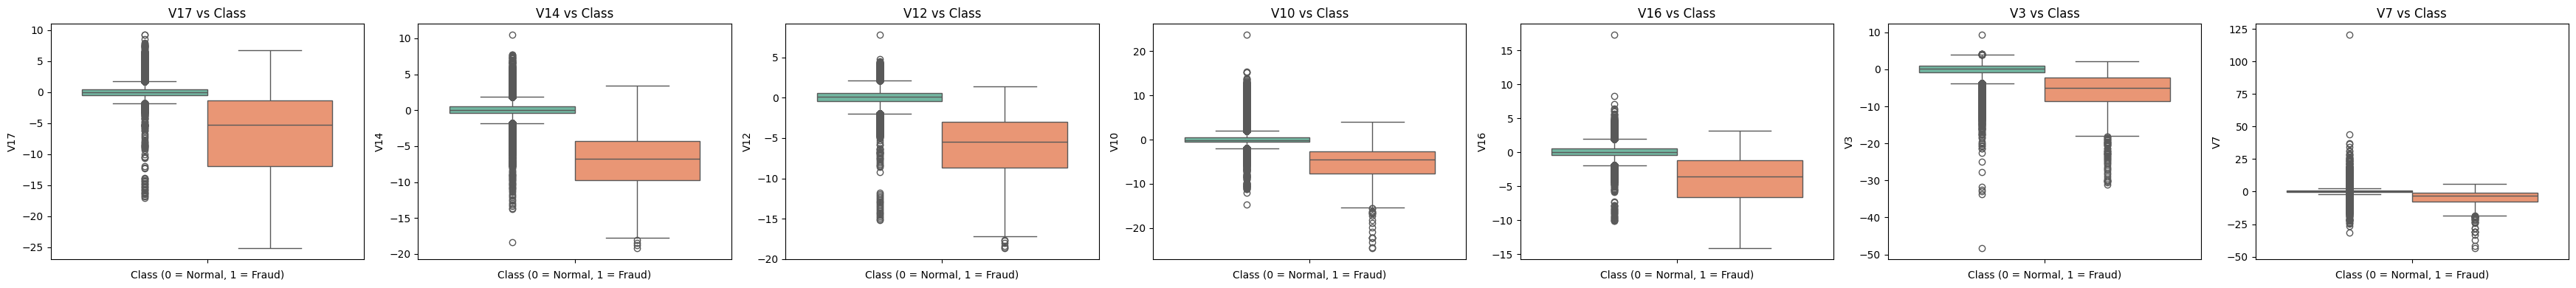

In [ ]:
# Find top 7 features most correlated with Class
target_corr = corr_matrix['Class'].drop('Class').abs()
top_features = target_corr.sort_values(ascending=False).head(7).index.tolist()
print("Top correlated features:", top_features)

colors = ["#66c2a5", "#fc8d62"]


fig, axes = plt.subplots(ncols=len(top_features), figsize=(5 * len(top_features), 4))

for i, feature in enumerate(top_features):
    sns.boxplot(hue='Class', y=feature, data=df, palette=colors, ax=axes[i], legend=False)
    axes[i].set_title(f'{feature} vs Class')
    axes[i].set_xlabel('Class (0 = Normal, 1 = Fraud)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

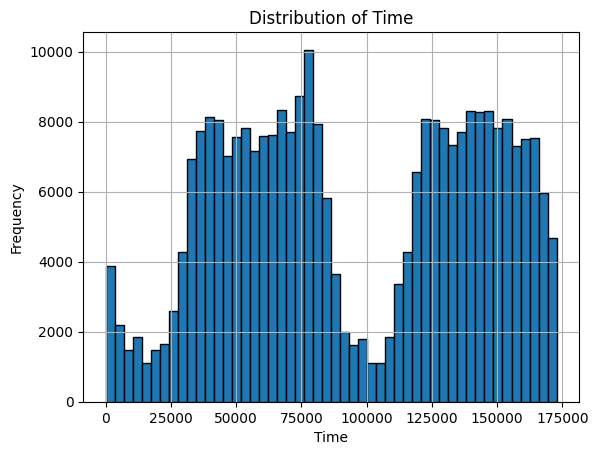

In [ ]:
plt.hist(df['Time'], bins=50, edgecolor='black')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

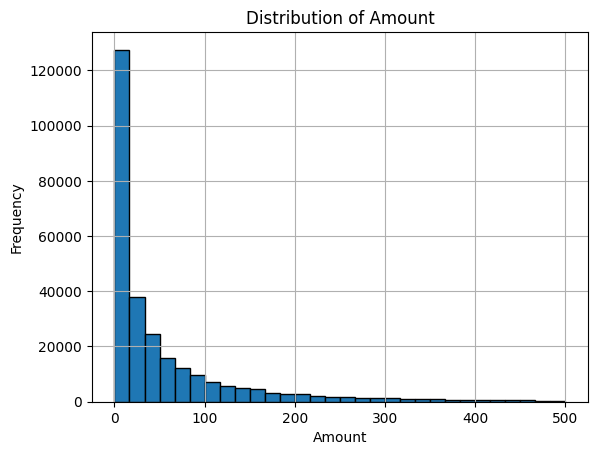

In [ ]:
mask = df['Amount'] < 500
plt.hist(df.loc[mask, 'Amount'], bins=30, edgecolor='black')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###Summary:
* The dataset is **strongly imbalanced**: fraudulent transactions account for less than 0.2% of all cases.
* **Key features** such as **V14, V10, V12, V17, V11, V4**, and **V18** show the strongest correlation with fraud (Class = 1).
* Boxplot analysis clearly demonstrates that these features have **distinct distributions** between fraud and non-fraud transactions.
* These selected variables are the **most important for fraud detection** and should be the main focus in further modeling steps.
* Amount is highly skewed with outliers, and **Needs normalization**
* The **Time histogram** shows that the data covers two days, measured in seconds.

#**2 Data Preprocessing**:

* Handle missing values, if any, and apply normalization or standardization techniques to prepare the data for modeling.

In [ ]:
df.isnull().sum().sum()

np.int64(0)

No missing values detected.

In [ ]:
# Standardisation of Amount

import numpy as np
from sklearn.preprocessing import StandardScaler

# Log-transform the 'Amount' feature to reduce skewness
df['Amount'] = np.log1p(df['Amount'])  # log1p ensures no log(0) error

---

* Reduces skewness in the distribution of ‘Amount’ using logarithmic transformation (helps when the data is right-skewed or has outliers).
* Standardizes (mean = 0, std = 1) the transformed amount for better model performance, especially for algorithms sensitive to feature scaling.
---

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets, keeping class ratio the same
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
# Show class distribution before SMOTE
print(f"Before resampling: {Counter(y_train)}")

# Apply SMOTE to the training data (oversampling the minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
print(f"After SMOTE: {Counter(y_resampled)}")

Before resampling: Counter({0: 199020, 1: 344})
After SMOTE: Counter({0: 199020, 1: 199020})


### Preprocessing Summary:

- No missing values detected in the dataset.
- Applied Log transform + StandardScaler to the Amount to normalize, since most values are low, and a few very high (outliers)
- Addressed class imbalance using SMOTE, resulting in balanced class distribution.

---

## **3 Feature Engineering:**

* Analyze the importance of the features (V1-V28) in predicting fraud and consider creating new features or aggregating existing ones for better model performance.

---

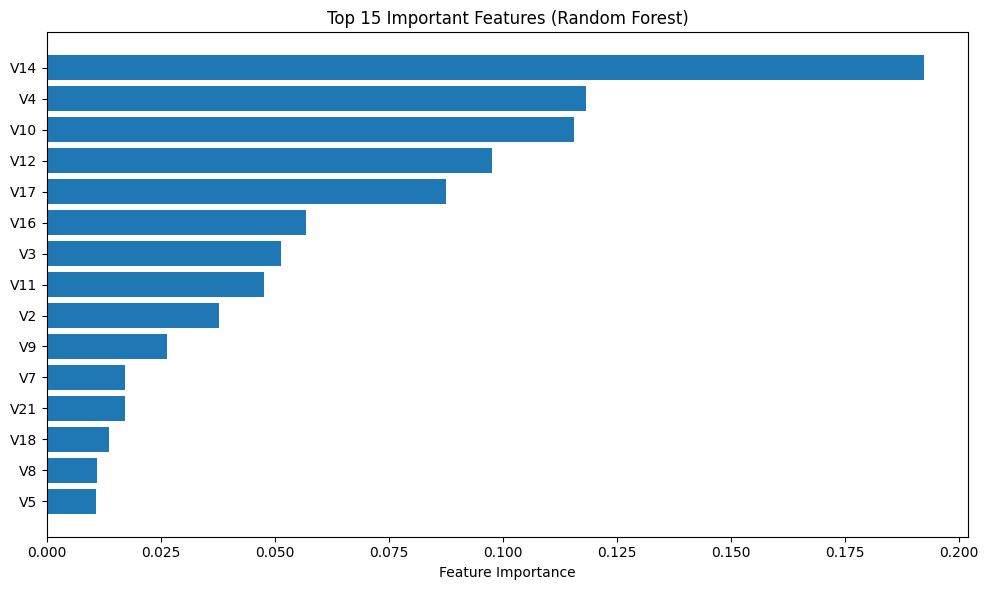

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Select features and the target variable

X = X_resampled
y = y_resampled

# 2. Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 3. Get feature importances from the trained model
importances = model.feature_importances_
feature_names = df.drop(columns='Class').columns

# 4. Create a DataFrame with features and their importance scores
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Visualize the top 15 most important features using a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()

Top features like V17, V14, and V12 have the greatest impact on fraud detection, making them essential for building accurate models.

---

* creating new features or aggregating existing ones for better model performance.

---

In [ ]:
# Create a Series with 0 counts for all 24 hours
all_hours = pd.Series(0, index=range(24))

# Count the number of frauds by each hour
fraud_by_hour = df[df['Class'] == 1]['Hour'].value_counts().sort_index()

# Combine the two Series, filling in the missing hours with 0
fraud_by_hour_full = all_hours.add(fraud_by_hour, fill_value=0)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(fraud_by_hour_full.index, fraud_by_hour_full.values, marker='o')
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Frauds')
plt.xticks(range(24))  # Ensure x-axis has all 24 hours
plt.grid(True)
plt.show()

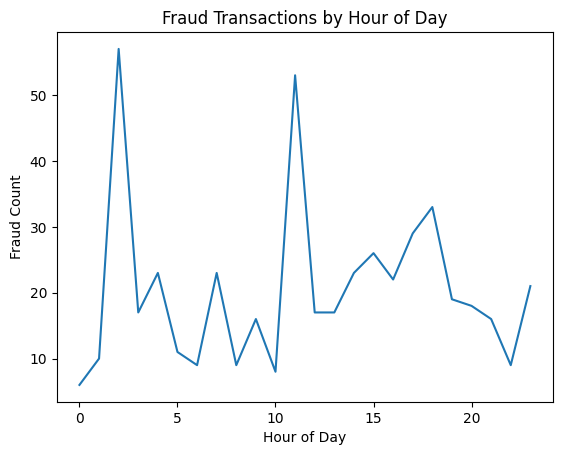

In [ ]:
# Create new features for hour and day extracted from the 'Time' feature
df['Hour'] = df['Time'] // 3600 % 24  # Calculate the hour of the day (0–23) from 'Time'
df['Day'] = df['Time'] // (3600 * 24)  # Calculate the day (relative to the dataset start) from 'Time'

# Count the number of frauds by each hour of the day
fraud_by_hour = df[df['Class'] == 1]['Hour'].value_counts().sort_index()

# Plot the number of fraudulent transactions per hour
plt.plot(fraud_by_hour.index, fraud_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Count')
plt.title('Fraud Transactions by Hour of Day')
plt.show()

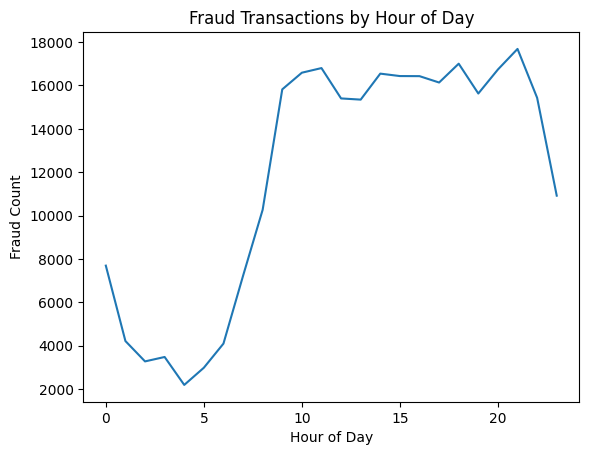

In [ ]:
# Count the number of frauds by each hour of the day
fraud_by_hour = df[df['Class'] == 0]['Hour'].value_counts().sort_index()

# Plot the number of fraudulent transactions per hour
plt.plot(fraud_by_hour.index, fraud_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Count')
plt.title('Fraud Transactions by Hour of Day')
plt.show()

---

###**4 Predictive Modeling:**

* Develop machine learning models to classify transactions as fraudulent or non-fraudulent. Consider using algorithms like Logistic Regression, Random Forest, XGBoost, or Neural Networks.

---

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


X_train = X_resampled
y_train = y_resampled


# 3. Define the models to train and compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 4. List to store results for each model
results = []


# 5. Train each model and evaluate its performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on the training data
    y_pred = model.predict(X_test)  # Predict the class labels for the test data
    y_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC AUC

    # Store main metrics in results list
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    })
    # Print full classification report and confusion matrix for each model
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Display summary table of all metrics for each model
results_df = pd.DataFrame(results)
print("\nSummary Table:")
print(results_df)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      1.000     0.977     0.988     85295
           1      0.062     0.872     0.117       148

    accuracy                          0.977     85443
   macro avg      0.531     0.924     0.552     85443
weighted avg      0.998     0.977     0.987     85443

Confusion Matrix:
 [[83359  1936]
 [   19   129]]

=== Random Forest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85295
           1      0.885     0.777     0.827       148

    accuracy                          0.999     85443
   macro avg      0.942     0.888     0.914     85443
weighted avg      0.999     0.999     0.999     85443

Confusion Matrix:
 [[85280    15]
 [   33   115]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85295
           1      0.800     0.811     0.805       148

    accuracy                          0.999     85443
   macro avg      0.900     0.905     0.903     85443
weighted avg      0.999     0.999     0.999     85443

Confusion Matrix:
 [[85265    30]
 [   28   120]]

Summary Table:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.977119   0.062470  0.871622  0.116584  0.966825
1        Random Forest  0.999438   0.884615  0.777027  0.827338  0.961654
2              XGBoost  0.999321   0.800000  0.810811  0.805369  0.976037


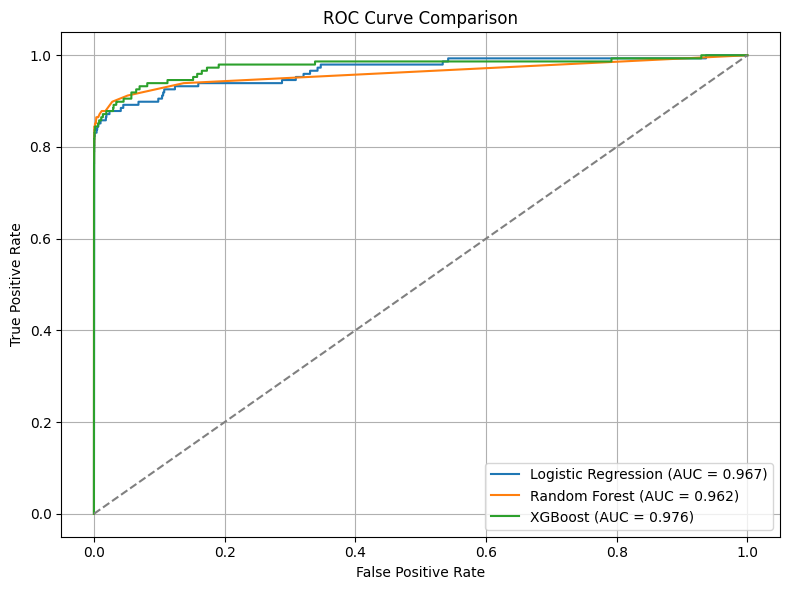

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Loop through each model to plot its ROC curve
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)     # Compute False Positive Rate and True Positive Rate
    roc_auc = auc(fpr, tpr)                           # Calculate Area Under the Curve (AUC)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')  # Plot ROC curve

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

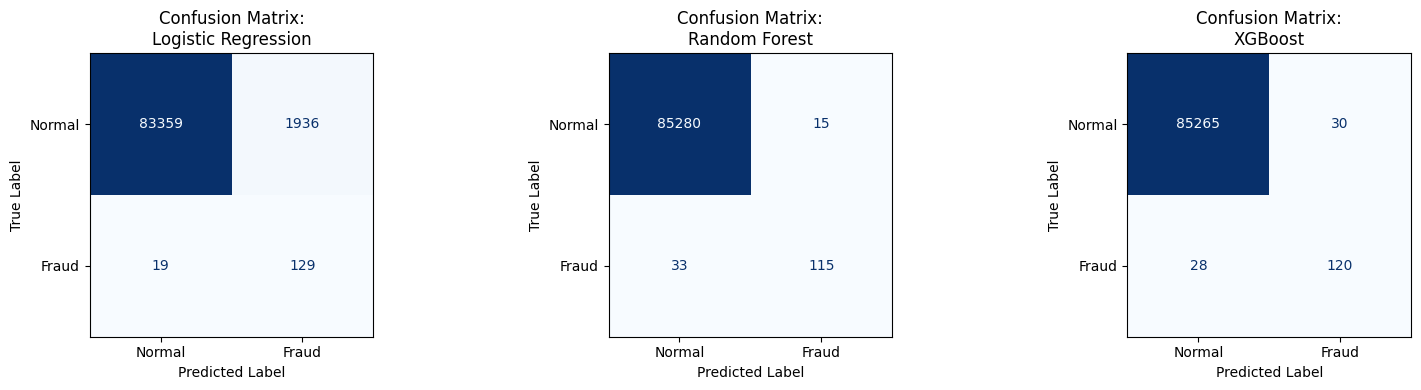

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Confusion matrices ]
cm_logreg = np.array([[83359, 1936],
                      [   19,  129]])
cm_rf = np.array([[85280, 15],
                  [33,   115]])
cm_xgb = np.array([[85265, 30],
                   [28,   120]])

labels = ["Normal", "Fraud"]
titles = ["Logistic Regression", "Random Forest", "XGBoost"]

cms = [cm_logreg, cm_rf, cm_xgb]

fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for ax, cm, title in zip(axes, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
    ax.set_title(f"Confusion Matrix:\n{title}", fontsize=12)
    ax.set_xlabel("Predicted Label", fontsize=10)
    ax.set_ylabel("True Label", fontsize=10)
    ax.grid(False)

plt.tight_layout()
plt.show()

---

* **Logistic Regression:** Performs well on normal transactions but misses many fraud cases (high false negatives).
* **Random Forest:** Achieves the best balance, accurately detecting both normal and fraudulent transactions.
* **XGBoost:** Delivers strong results, similar to Random Forest, but identifies slightly fewer fraud cases.

**Conclusion:**
Among the tested models, Random Forest provides the most reliable performance for fraud detection in this dataset, making it the best choice for further deployment.

---

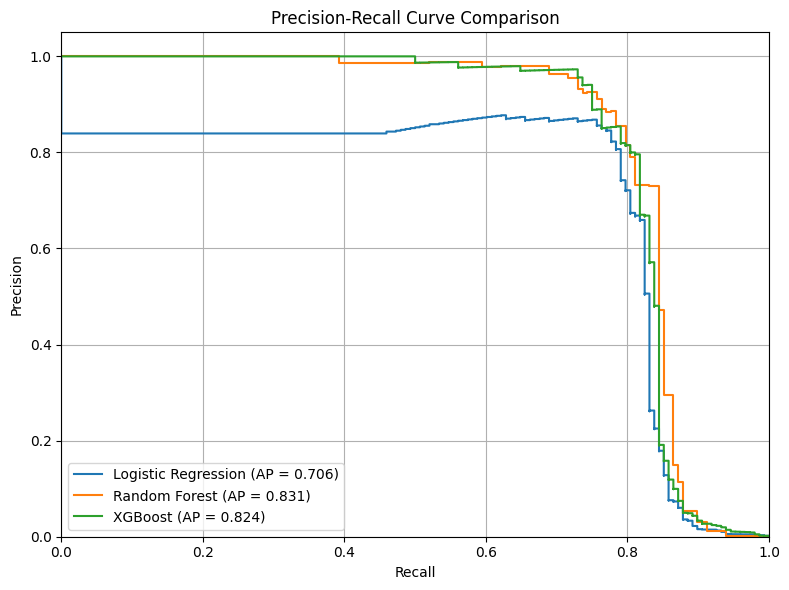

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

# Loop through each model to plot its PR curve
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Предсказанные вероятности для класса 1
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    plt.step(recall, precision, where='post', label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---

###**Credit Card Fraud Detection Project**

1. **Objective**

  Detect fraudulent credit card transactions using machine learning, while handling class imbalance and ensuring model interpretability.

2. **Dataset Overview**

  Real-world anonymized dataset

  Features: V1-V28 (PCA-transformed), Amount, Time

  Target: Class (0 = Normal, 1 = Fraud)

  Highly imbalanced: ~0.17% fraud cases

3. **Data Preprocessing**

  Checked for missing values: None found

  Standardized all numerical features (Amount, Time, V1-V28)

  Handled class imbalance using SMOTE on training data

4. **Modeling & Evaluation**

  Trained and evaluated: Logistic Regression, Random Forest, XGBoost

  Metrics used: Precision, Recall, F1-score, ROC AUC, PR AUC

5. **Key Results**

  Overall Recommendation:

  Best all-rounder: Random Forest, due to its strong precision and F1-Score.

  Best for detecting positives (recall): XGBoost.

  Avoid using Logistic Regression in this case due to its very poor precision despite high recall.

6. **Feature Insights**

  Top important features: V14, V4, V10, V12, V17

  Feature importance derived from Random Forest

  Optional feature engineering: Hour, Amount_log, aggregated V-scores

7. **Conclusion**

  Successfully built an end-to-end fraud detection pipeline

  Balanced model performance with interpretability

  Ready for deployment or further tuning (threshold adjustment, SHAP, etc.)

---

---

###Part 1: Real-Time Fraud Detection and Prevention Strategy

**1.1. Model Selection and Risk Scoring System Implementation**
* Model Selection: Use XGBoost due to its high accuracy and performance.

* Risk Scoring: The model should output a fraud probability (risk score) from 0.0 to 1.0.

* Implementation: Deploy the model as a microservice for real-time transaction processing. To ensure high speed and the ability to handle a large number of responses per second, we suggest using a non-relational data warehouse and synchronous-type integration, as our response plays a crucial role in the overall process.

**1.2. Three-Tier Decision System (Triage System)**
* Level 1: Low Risk (score < 0.4) — Automatic Approval.

  * Action: The transaction is instantly approved to ensure uninterrupted service.

* Level 2: Medium Risk (0.4 ≤ score < 0.8) — Automatic Challenge.

  * Action: Request Two-Factor Authentication (2FA) to confirm the operation.

* Level 3: High Risk (score ≥ 0.8) — Automatic Block and Alert.

  * Action: The transaction is declined, an alert is sent to the customer, and the case is forwarded for manual review.

**1.3. Feedback Loop and Model Adaptation**
* Continuous Learning: Collect the results of all checks (successful and unsuccessful) to retrain the model.

* Adaptation: Regularly retrain the model on fresh data to combat new types of fraud.

---


###Part 2: Additional Data for Accuracy Enhancement
**2.1. Internal Data**
* Behavioral Data:

  * Frequency, amount, time, and category (MCC) of transactions.

  * Deviation from the average transaction amount and typical customer behavior.

* Geolocation and Technical Data:

  * Distance between the customer's location and the transaction location.

  * Device Fingerprint, IP address, use of VPN/proxy.

**2.2. External Data Sources**
* Global Fraud Databases: Services to check the reputation of IPs, emails, devices (e.g., MaxMind, Sift).

* Mobile Operator Data: Check phone geolocation (with user consent).

* Social Media Data: For additional identity verification during manual reviews.

---